In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

In [8]:
!pip install bs4

  Using cached bs4-0.0.1-py3-none-any.whl
  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)
  Using cached soupsieve-2.2.1-py3-none-any.whl (33 kB)


You should consider upgrading via the 'c:\users\82108\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
# FinanceDataReader 를 fdr 별칭으로 가져오기
import FinanceDataReader as fdr

## 개별 종목의 일별 시세 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [10]:
# 삼성전자, 2017년~현재 일별 시세 받아오기
# 삼성전자의 종목 번호 '005930'
df = fdr.DataReader('005930', '2017', '2021')
df.head()


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


## 상장종목 목록 가져오기

In [3]:
#가져온 데이터 krx_data.csv로 저장하기
krx = fdr.StockListing('KRX')
krx.to_csv('krx_data.csv', encoding='utf-8-sig', index=False)

In [12]:
# 이전 강의에서 저장해 놓았던 csv 파일로 분석을 합니다.
# colab 사용자의 경우 이미 csv 파일이 지워졌을 수 있기 때문에 파일이 없을 경우 아래 셀에서 다시 load하면 됩니다.
df_krx = pd.read_csv('krx_data.csv')
df_krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7131,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7132,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7133,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7134,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


## 상장종목 목록 사용하기
* 종목명과 심볼을 찾기 위해 상장종목 목록을 사용합니다.

In [13]:
# DataFrame 에 어떤 데이터가 들어있는 head()로 일부 데이터만 가져와 봅니다.
df_krx[["Symbol","Name"]].head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [7]:
# df_krx의 Name column 에서 '빅히트'에 해당하는 row를 전부 가져오는데 Name column만 가져와
# list 형태로 index 번호는 빼고 ['빅히트'] 만 가져오게 되고 [0]을 통해 list에 있는 string만 가져오게 됩니다.
# 빅히트 (series) -> ['빅히트'] (list) -> '빅히트' (string)
item_name="SK하이닉스"
df_krx.loc[df_krx["Name"] ==item_name, "Symbol"].tolist()

['000660']

## 종목명으로 종목 코드를 받아오는 함수 만들기

In [11]:
# 종목명으로 종목코드 받아오는 함수 만들기
# df_krx의 Name column에서 같은 값이 있으면 
# row의 Symbol column의 값을 list로 name_list에 저장하기
# item_code_by_item_name 함수를 만듭니다.

def item_code_by_item_name(item_name):
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False
item_name  = input("찾고자하는 종목명을 입력하세요")   
data = item_code_by_item_name(item_name)
print(data)
df = fdr.DataReader(data, '2017', '2021')
df

찾고자하는 종목명을 입력하세요하이브
352820


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
2020-10-22,174735,183150,173745,178200,1193994,0.005587
2020-10-23,181170,182160,169785,170775,905547,-0.041667
2020-10-26,171270,171765,154440,154440,987951,-0.095652
2020-10-27,152955,164340,150975,160875,1118487,0.041667


In [11]:
item_code_by_item_name("하이브")

'352820'

## 종목명으로 일별시세를 받아오는 함수 만들기

In [12]:
# item_code_by_item_name : 종목명으로 종목번호 가져오기
# find_item_list : 종목번호로 해당연도 데이터 가져오기
# find_item_list는 year 값이 없으면 기본으로 2020년 데이터를 선택

def find_item_list(item_name, year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로
    종목의 시세를 수집합니다.
    """
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [13]:
find_item_list('빅히트')

False

## 데이터 시각화 툴 소개

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## 개별종목 시세 시각화
### pandas 의 plot으로 시각화 하기

## 데이터 시각화를 위한 폰트설정

In [14]:
def get_font_family():
    import platform
    system_name = platform.system()
    if system_name == "Darwin":
        font_family - "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath ="usr/폰트경로"
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"

    return font_family

    

In [15]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

'Malgun Gothic'

In [16]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.
import matplotlib.pyplot as plt

# 폰트설정
font_family = get_font_family()
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### 폰트 설정 확인하기

<AxesSubplot:title={'center':'한글 폰트 확인 '}>

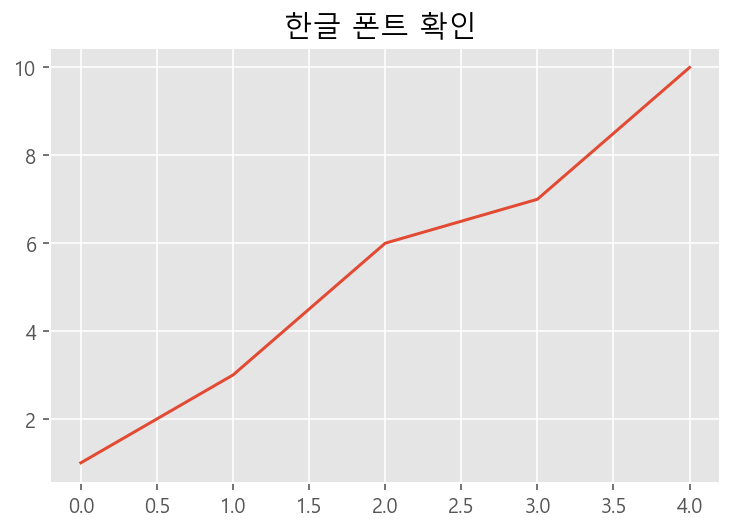

In [17]:
# 한글폰트 확인하기
pd.Series([1,3,6,7,10]).plot(title="한글 폰트 확인 ")

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

### Market

* KOSPI (Korea Composite Stock Price Index) 
    * 우리나라의 종합주가지수(KOSPI)는 증권거래소가 1964.1.4일을 기준시점으로 다우존스식 주가평균을 지수화한 수정주가 평균지수를 산출, 발표하기 시작하였다. 다우존스식 주가지수는 주가지수를 구성하는 상장종목 중 일부 우량주만을 선정하여 산출하는 방식이다. 시가총액식 주가지수는 일정시점의 시가총액과 현재시점의 시가총액을 대비, 현재의 주가수준을 판단하는 방식이다. 즉, 지난 1980년 1월 4일 기준 상장종목 전체의 시가총액을 100으로 보고 현재 상장종목들의 시가총액이 어느 수준에 놓여 있는지를 보여주는 시스템이다.
    * 종합주가지수 = (비교시점의 시가총액 ÷ 기준시점의 시가총액) × 100
    * 출처 : [네이버 지식백과] 종합주가지수 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=72147&cid=43667&categoryId=43667


* KOSDAQ (Korea Securities Dealers Automated Quotation) 
    * 미국의 나스닥(NASDAQ)을 한국식으로 합성한 용어로 1996년 7월 1일 증권업협회와 증권사들이 설립한 코스닥증권(주)에 의하여 개설되었다. 코스닥의 개장으로 단순히 증권거래소 상장을 위한 예비적 단계였던 장외시장이 미국의 나스닥(NASDAQ)과 같이 자금조달 및 투자시장으로 독립적인 역할을 수행하게 되었다. 이후 2005년 1월 유가증권시장, 코스닥시장, 선물시장이 증권선물거래소(현 한국거래소)로 통합됨에 따라 코스닥시장도 거래소가 개설한 정규시장으로 편입되었다. 코스닥은 유가증권시장에 비해 진입요건이 상대적으로 덜 까다롭기 때문에 주로 중소벤처기업들이 상장되어 있다.
    * 출처 : [네이버 지식백과] KOSDAQ (매일경제, 매경닷컴) https://terms.naver.com/entry.nhn?docId=18639&cid=43659&categoryId=43659


* KONEX(Korea New Exchange) : 
    * 일정 요건을 갖춘 비상장 기업에 문호를 개방하기 위해 개설하는 유가증권시장, 코스닥시장에 이은 제3의 주식시장을 일컫는다. 코넥스시장은 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 중소기업과 벤처기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장으로, 2013년 7월 1일 개장되었다. 
    * 출처 : [네이버 지식백과] 코넥스 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=1006691&cid=43667&categoryId=43667

In [18]:
# 데이터 분석을 위해 pandas, 시각화를 위해 seaborn 불러오기
import pandas as pd
import seaborn as sns
import numpy as np

### 서브플롯 그리기

In [19]:
# 이전 강좌에서 to_csv로 저장해둔 krx_data.csv 파일을 pd.read_csv 로 불러옵니다.
df  = pd.read_csv("krx_data.csv")

In [20]:
df.shape

(7045, 10)

## 데이터 색인하기

### Series
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [21]:
df

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7040,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7042,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7043,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [22]:
# Name 컬럼 하나만 가져옵니다.
df['Name']

0            3S
1        AJ네트웍스
2         AK홀딩스
3        APS홀딩스
4         AP시스템
         ...   
7040    흥국화재2우B
7041      흥국화재우
7042       흥아해운
7043         희림
7044         힘스
Name: Name, Length: 7045, dtype: object

In [23]:
# Market column에 어떤 데이터들이 있는지 확인합니다.
df['Market'].uniqueque()

AttributeError: 'Series' object has no attribute 'uniqueque'

In [24]:
df['Market'].value_counts()

KOSPI     5379
KOSDAQ    1529
KONEX      137
Name: Market, dtype: int64

<AxesSubplot:>

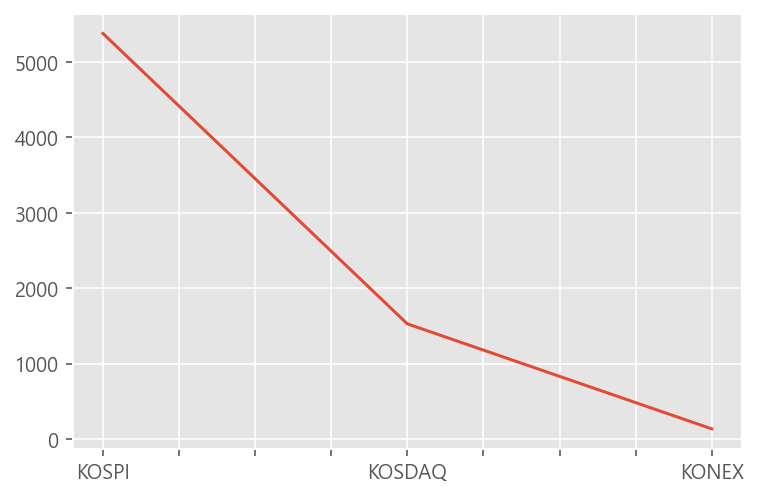

In [25]:
df['Market'].value_counts().plot()

<AxesSubplot:>

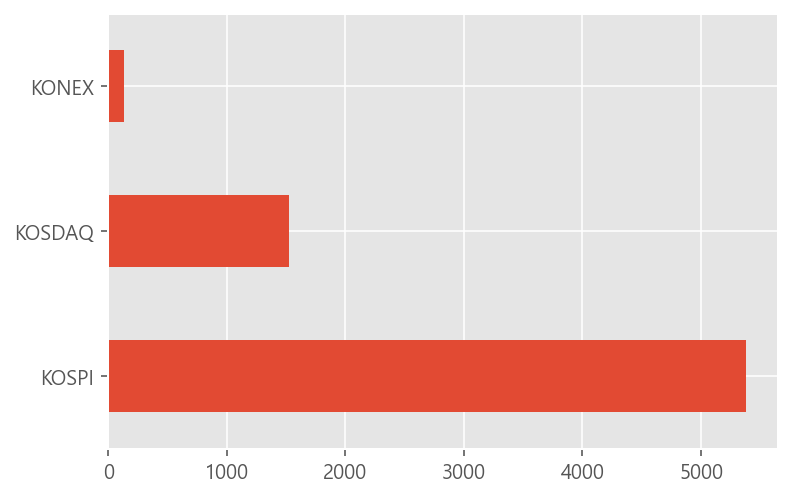

In [26]:
#plot.barh() 를 이용해서 막대그래프 그리기
#df['Market'].value_counts().plot.bar()
df['Market'].value_counts().plot.barh()

<AxesSubplot:xlabel='count', ylabel='Market'>

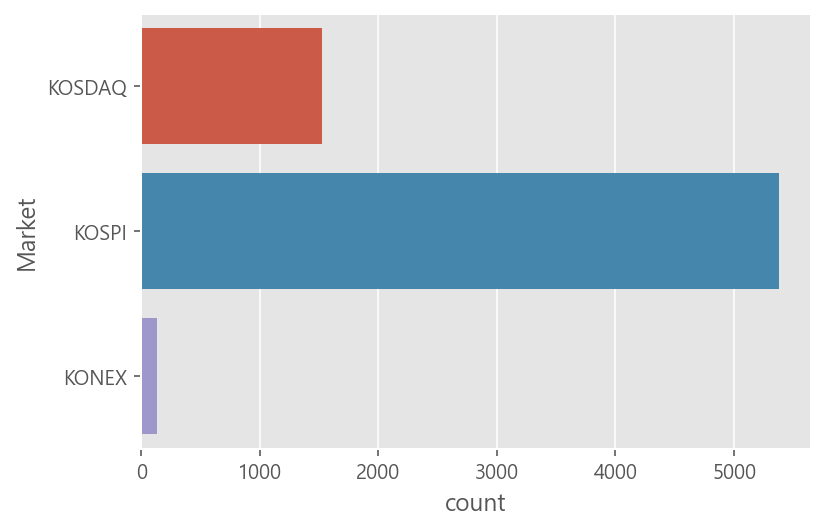

In [27]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data=df , y="Market")

### Sector

In [28]:
df.tail()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
7040,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7042,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7043,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시
7044,238490,KOSDAQ,힘스,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


In [29]:
# 섹터의 빈도수를 구합니다.
# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당합니다.
sector_count_top = df['Sector'].value_counts().head(30)
sector_count_top

특수 목적용 기계 제조업                            144
소프트웨어 개발 및 공급업                           139
전자부품 제조업                                 125
자동차 신품 부품 제조업                             96
의약품 제조업                                   94
기타 화학제품 제조업                               93
기타 금융업                                    93
금융 지원 서비스업                                76
통신 및 방송 장비 제조업                            71
1차 철강 제조업                                 57
반도체 제조업                                   56
자연과학 및 공학 연구개발업                           56
의료용 기기 제조업                                53
일반 목적용 기계 제조업                             44
플라스틱제품 제조업                                43
기초 화학물질 제조업                               42
기초 의약물질 및 생물학적 제제 제조업                     39
기타 전문 도매업                                 39
컴퓨터 프로그래밍, 시스템 통합 및 관리업                   36
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업         34
기타 식품 제조업                                 34
영화, 비디오물, 방송프로그램 제작 및 배급업                 32
의료용품 및 기타 

<AxesSubplot:title={'center':'Sector 빈도수'}>

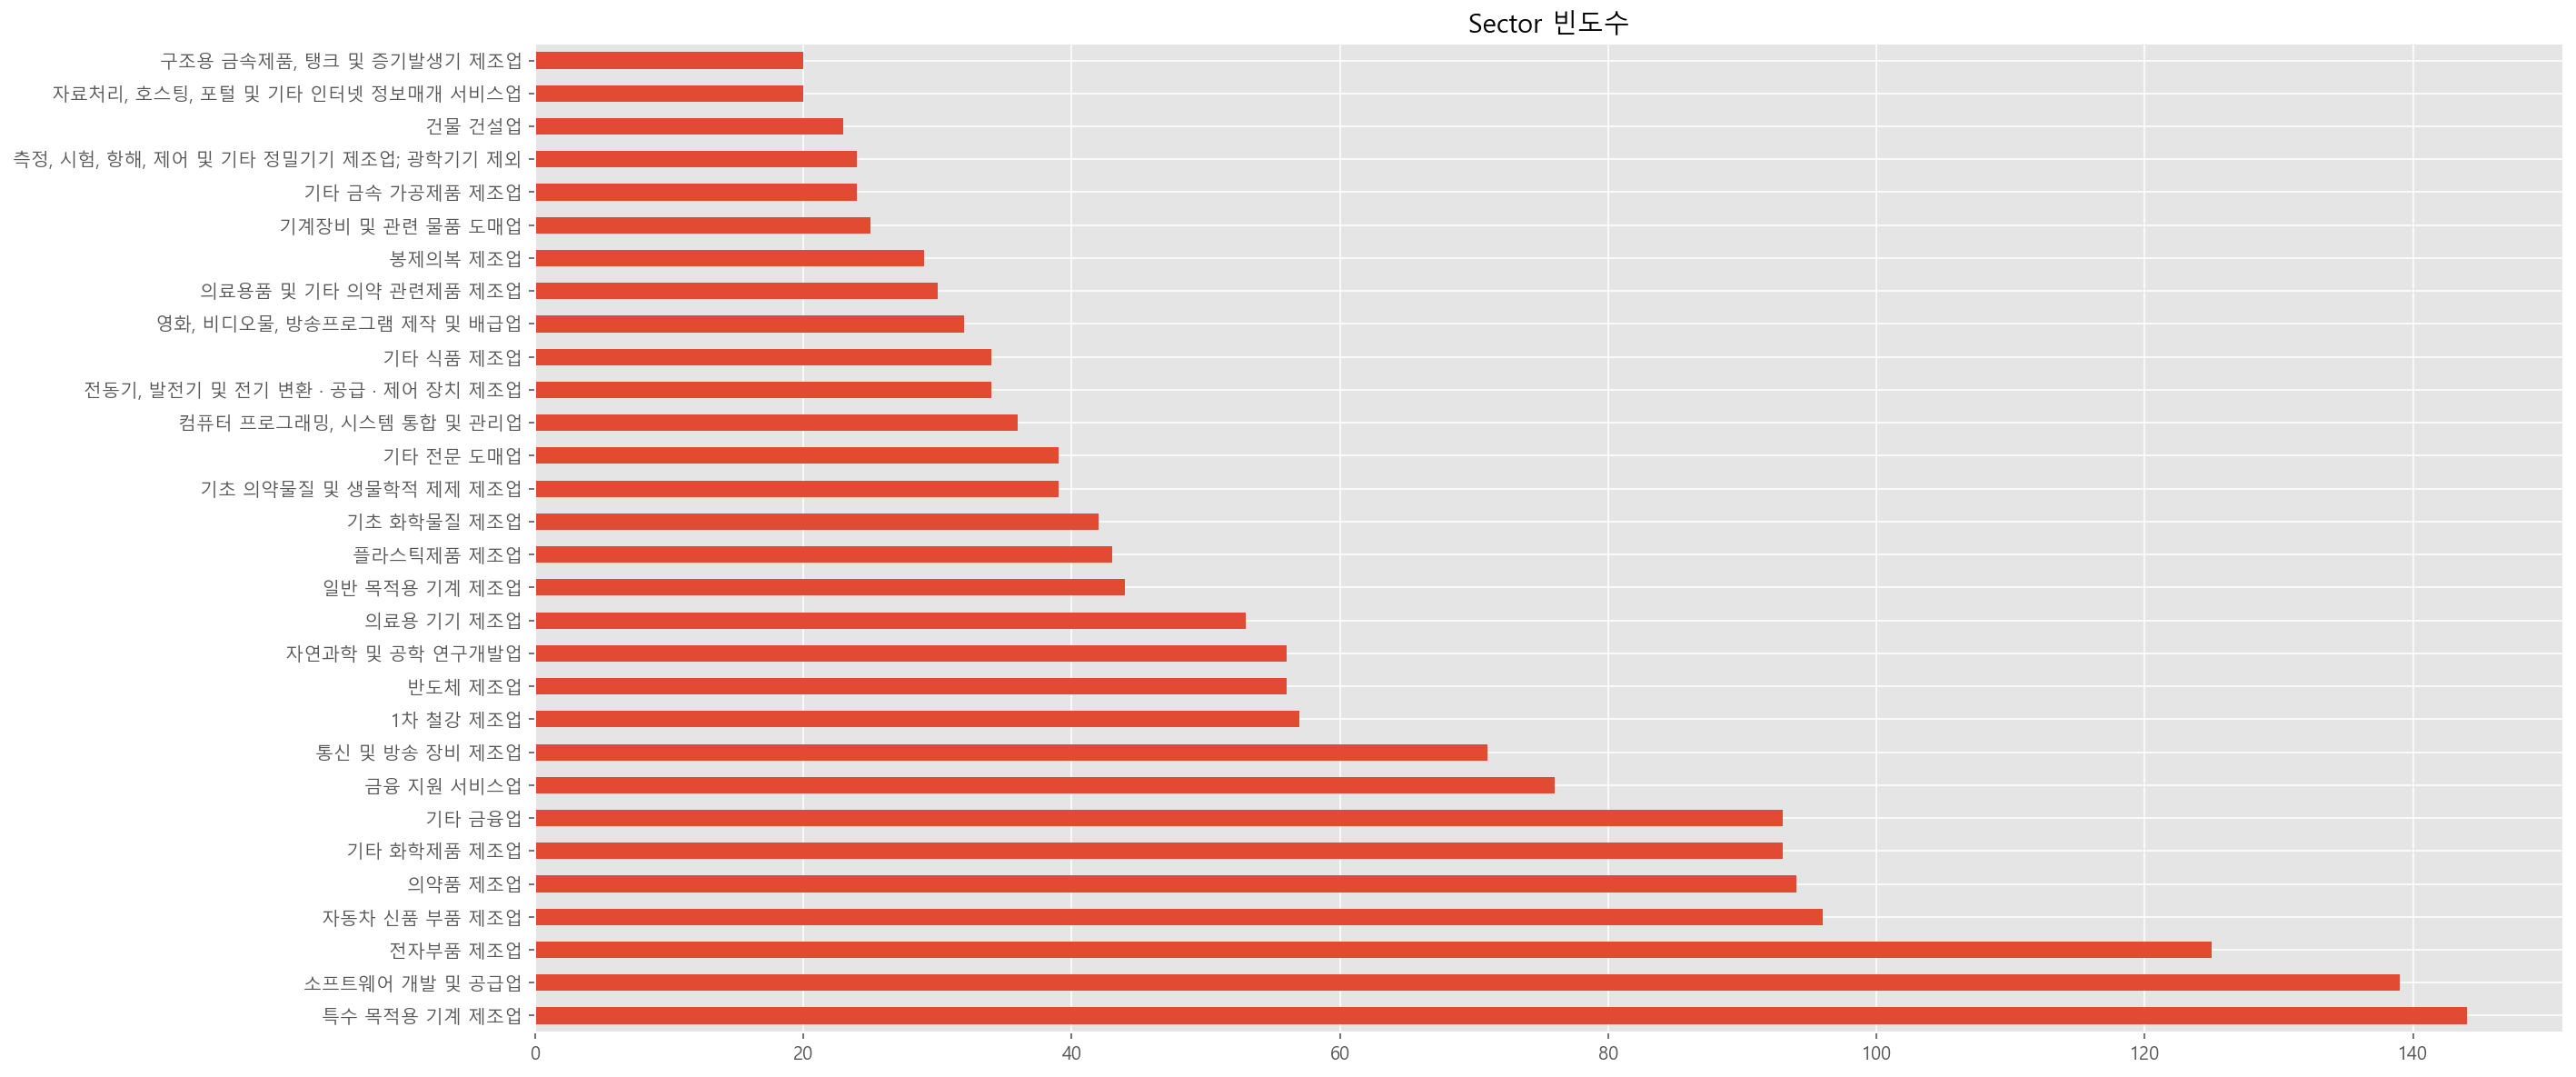

In [30]:
#sector_count_top barh그래프 그리기
sector_count_top.plot.barh(figsize=(20,10) , title="Sector 빈도수")

<AxesSubplot:xlabel='count', ylabel='Sector'>

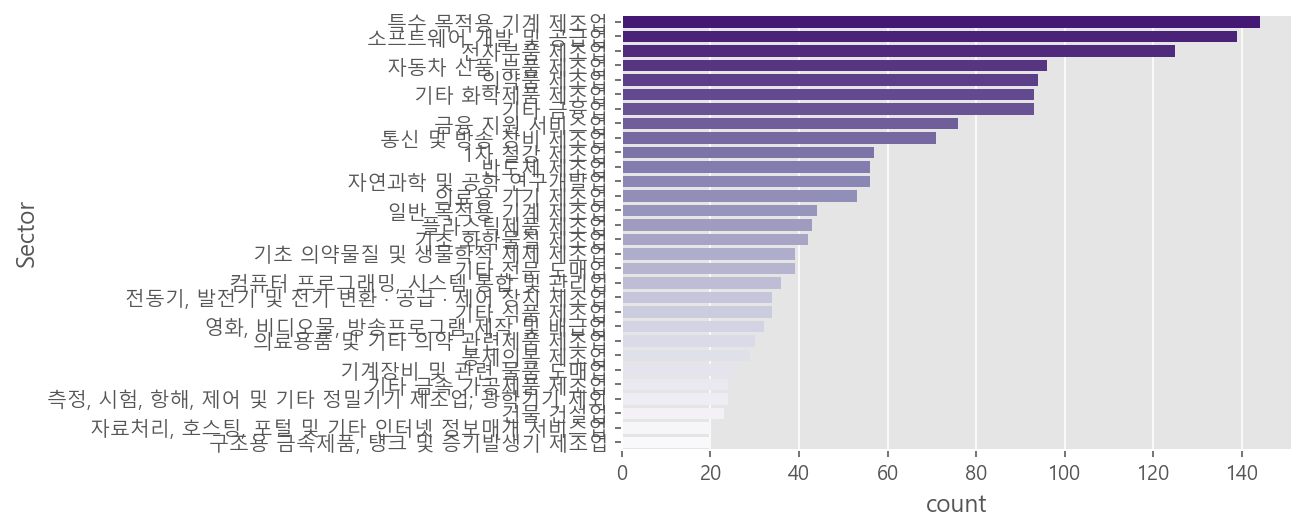

In [31]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data=df[df['Sector'].isin(sector_count_top.index)] , y="Sector", palette="Purples_r" , order=sector_count_top.index)

In [32]:
# 빈도수가 가장 많은 데이터 색인하기
df[df['Sector'] == "특수 목적용 기계 제조업"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
83,068790,KOSDAQ,DMS,특수 목적용 기계 제조업,LCD 제조장비,2004-10-01,12월,박용석,http://www.dms21.co.kr,경기도
106,083450,KOSDAQ,GST,특수 목적용 기계 제조업,"GasScrubber,Chiller",2006-02-01,12월,"김덕준, 장광수(각자대표)",http://www.gst-in.com,경기도
132,078150,KOSDAQ,HB테크놀러지,특수 목적용 기계 제조업,TFT-LCD검사장비,2004-12-08,12월,문성준,http://www.ncbnet.co.kr,충청남도
...,...,...,...,...,...,...,...,...,...,...
7003,010660,KOSPI,화천기계,특수 목적용 기계 제조업,"선반,밀링,연삭기,CNC선반,CNC밀링,머시닝센타 제조,판매/자동차부품(실린더블럭) 제조",1988-12-12,12월,"권영열, 권형석",http://www.hwacheon.co.kr,서울특별시
7004,000850,KOSPI,화천기공,특수 목적용 기계 제조업,"CNC선반,CNC밀링,연마기(금속공작기계),MC공작기계,COPY밀링기계,주방품 제조,도매",1999-11-18,12월,"각자대표이사 권영두, 권영렬",http://www.hwacheon.com,광주광역시
7020,090710,KOSDAQ,휴림로봇,특수 목적용 기계 제조업,제조업용로봇및서비스로봇,2006-12-05,12월,정광원,http://www.dstrobot.com,충청남도
7036,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도


### Industry

In [33]:
# Industry 의 빈도수를 구합니다.
df['Industry'].value_counts()

기업인수합병                                        39
지주회사                                          20
지주사업                                           9
화장품                                            7
기업 인수 및 합병                                     7
                                              ..
TFT-LCD BLU(Back Light Unit)                   1
특수화물해상운송(케이컬,액화가스,냉동.냉장화물),선박대여                1
인공유전자 플랫폼(OliPass PNA) 기술을 활용한 RNA치료제 신약개발     1
프레스,자동화장치,자동차부품 제조,도매                          1
송배전 금구류 및 합성수지 제품                              1
Name: Industry, Length: 2272, dtype: int64

<AxesSubplot:title={'center':'Industry 시각화'}>

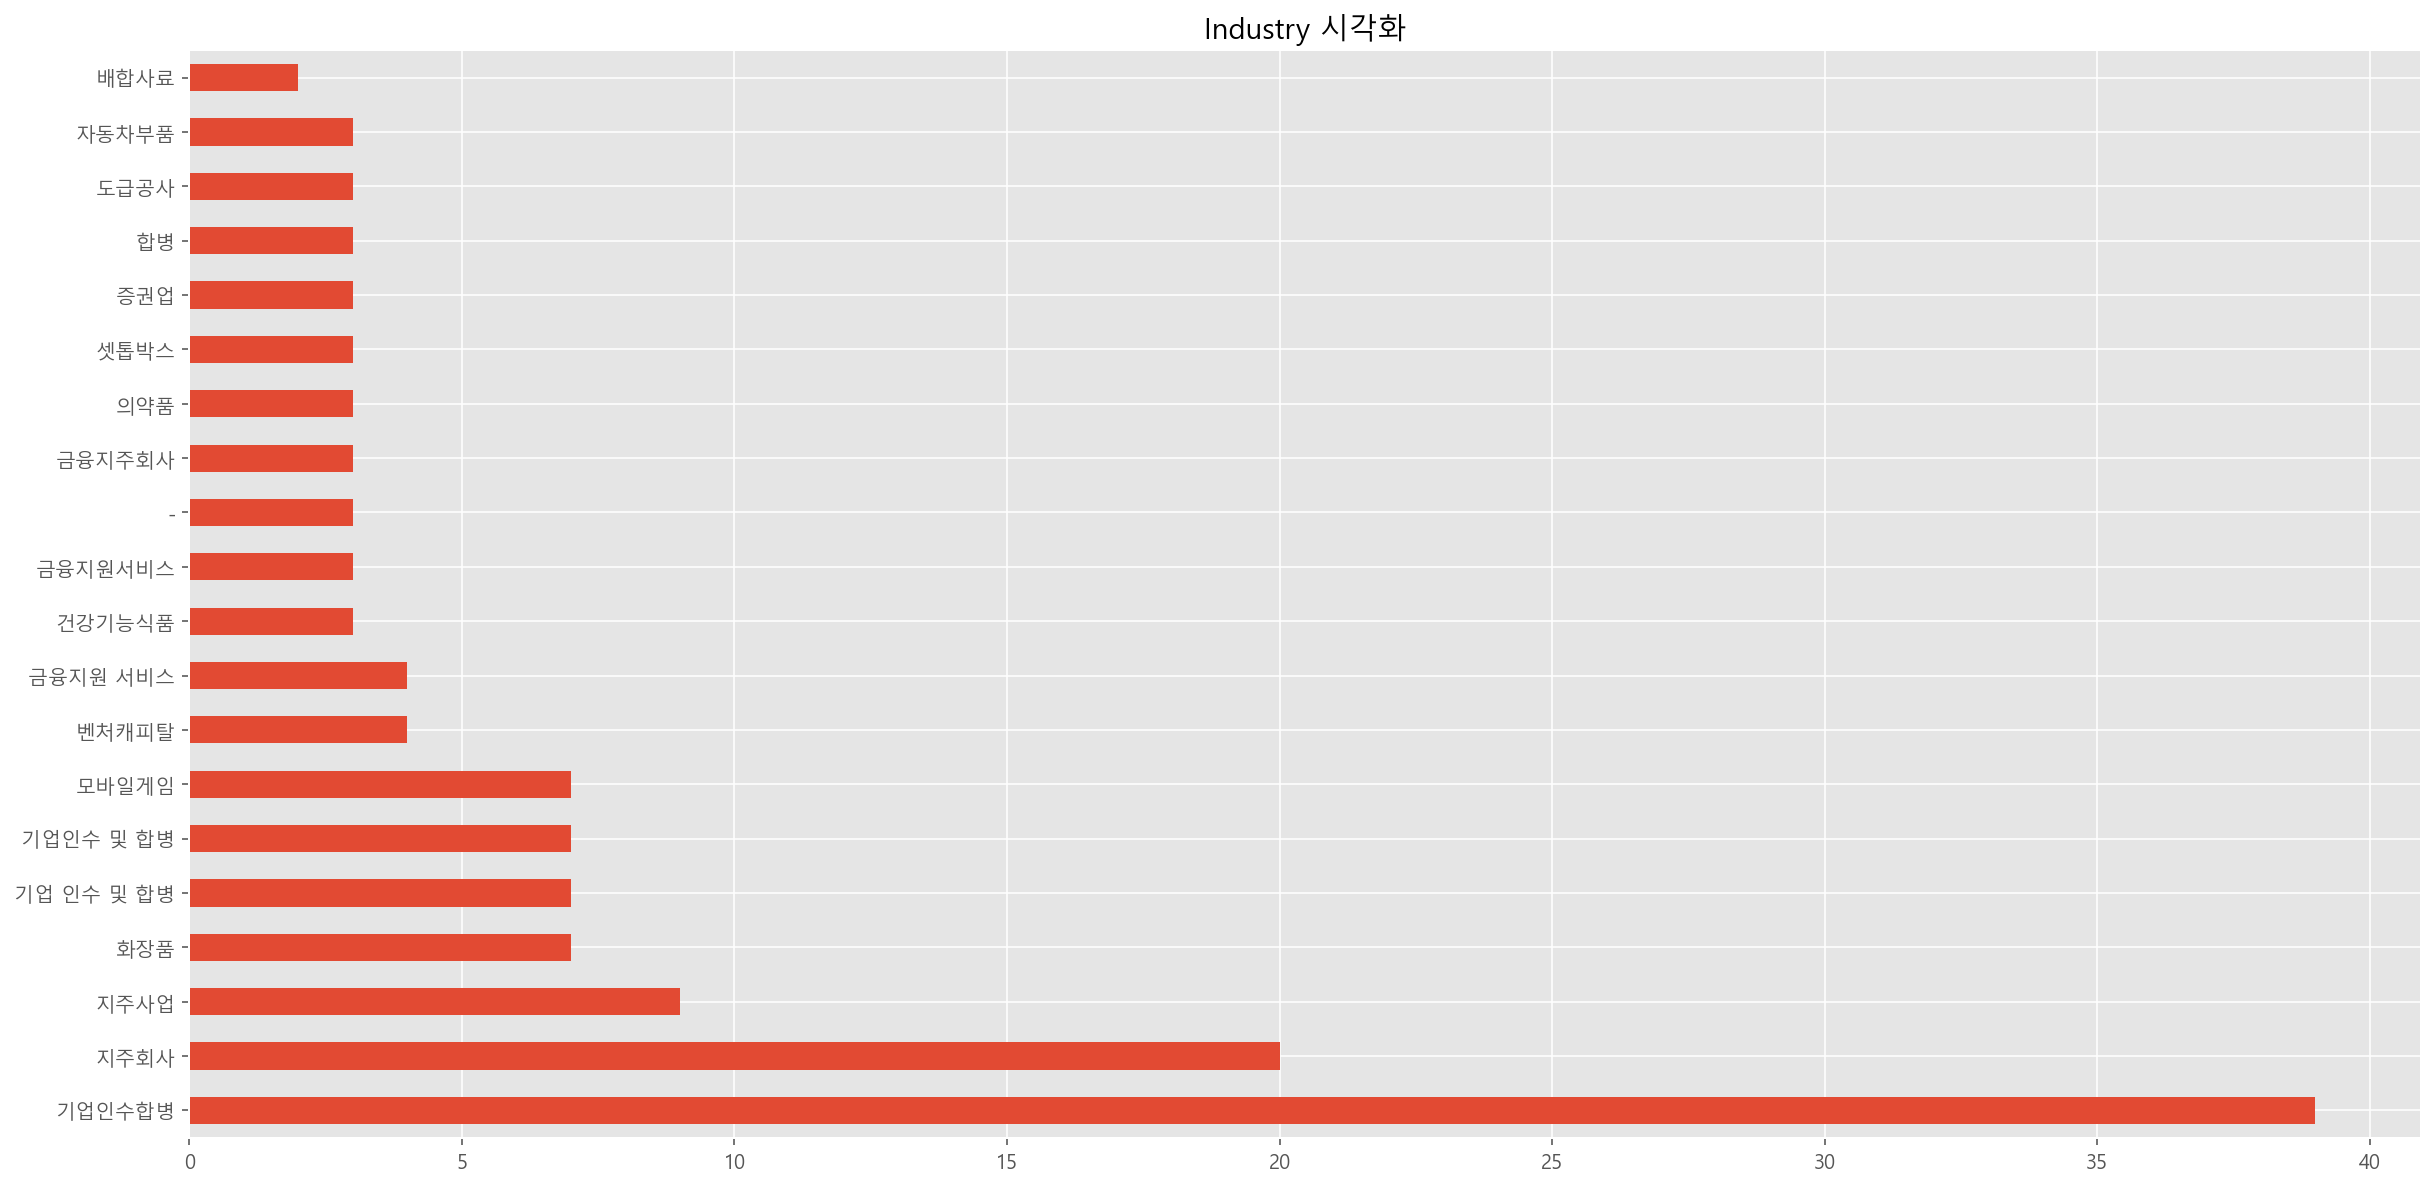

In [34]:
# Industry 빈도수를 pandas 의 plot 기능을 사용해 시각화 합니다.
df['Industry'].value_counts().head(20).plot.barh(figsize=(20,10) , title="Industry 시각화")

<AxesSubplot:title={'center':'Industry 시각화'}>

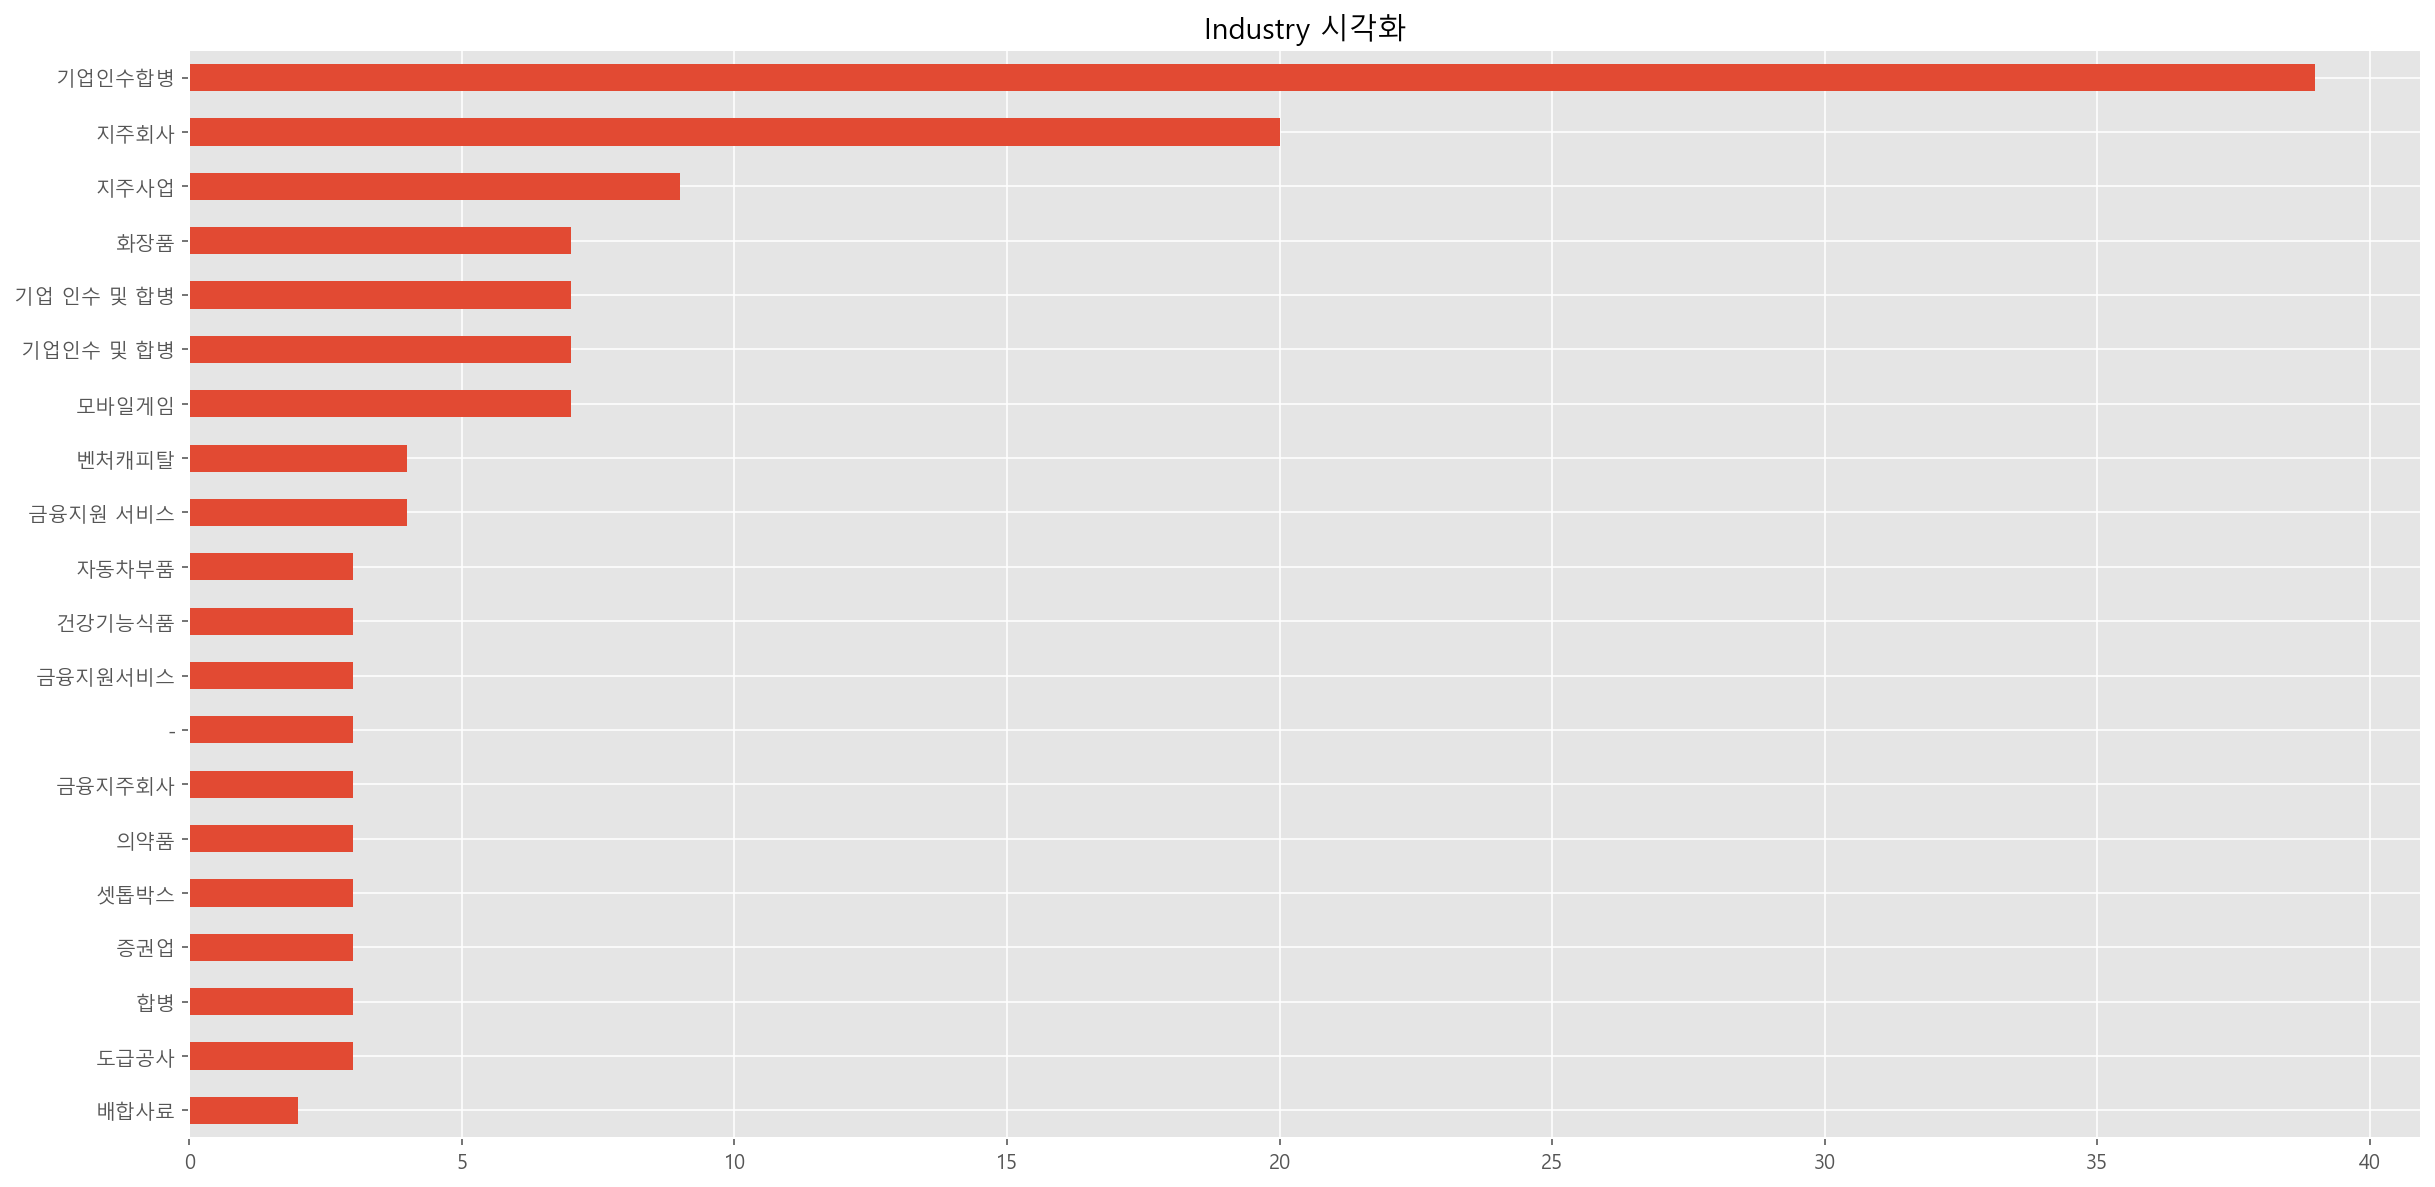

In [35]:
# sort_values 기능을 사용해 반대로 정렬해서 표시합니다.
df['Industry'].value_counts().head(20).sort_values().plot.barh(figsize=(20,10) , title="Industry 시각화")

### Region 

<AxesSubplot:title={'center':'Region 시각화'}>

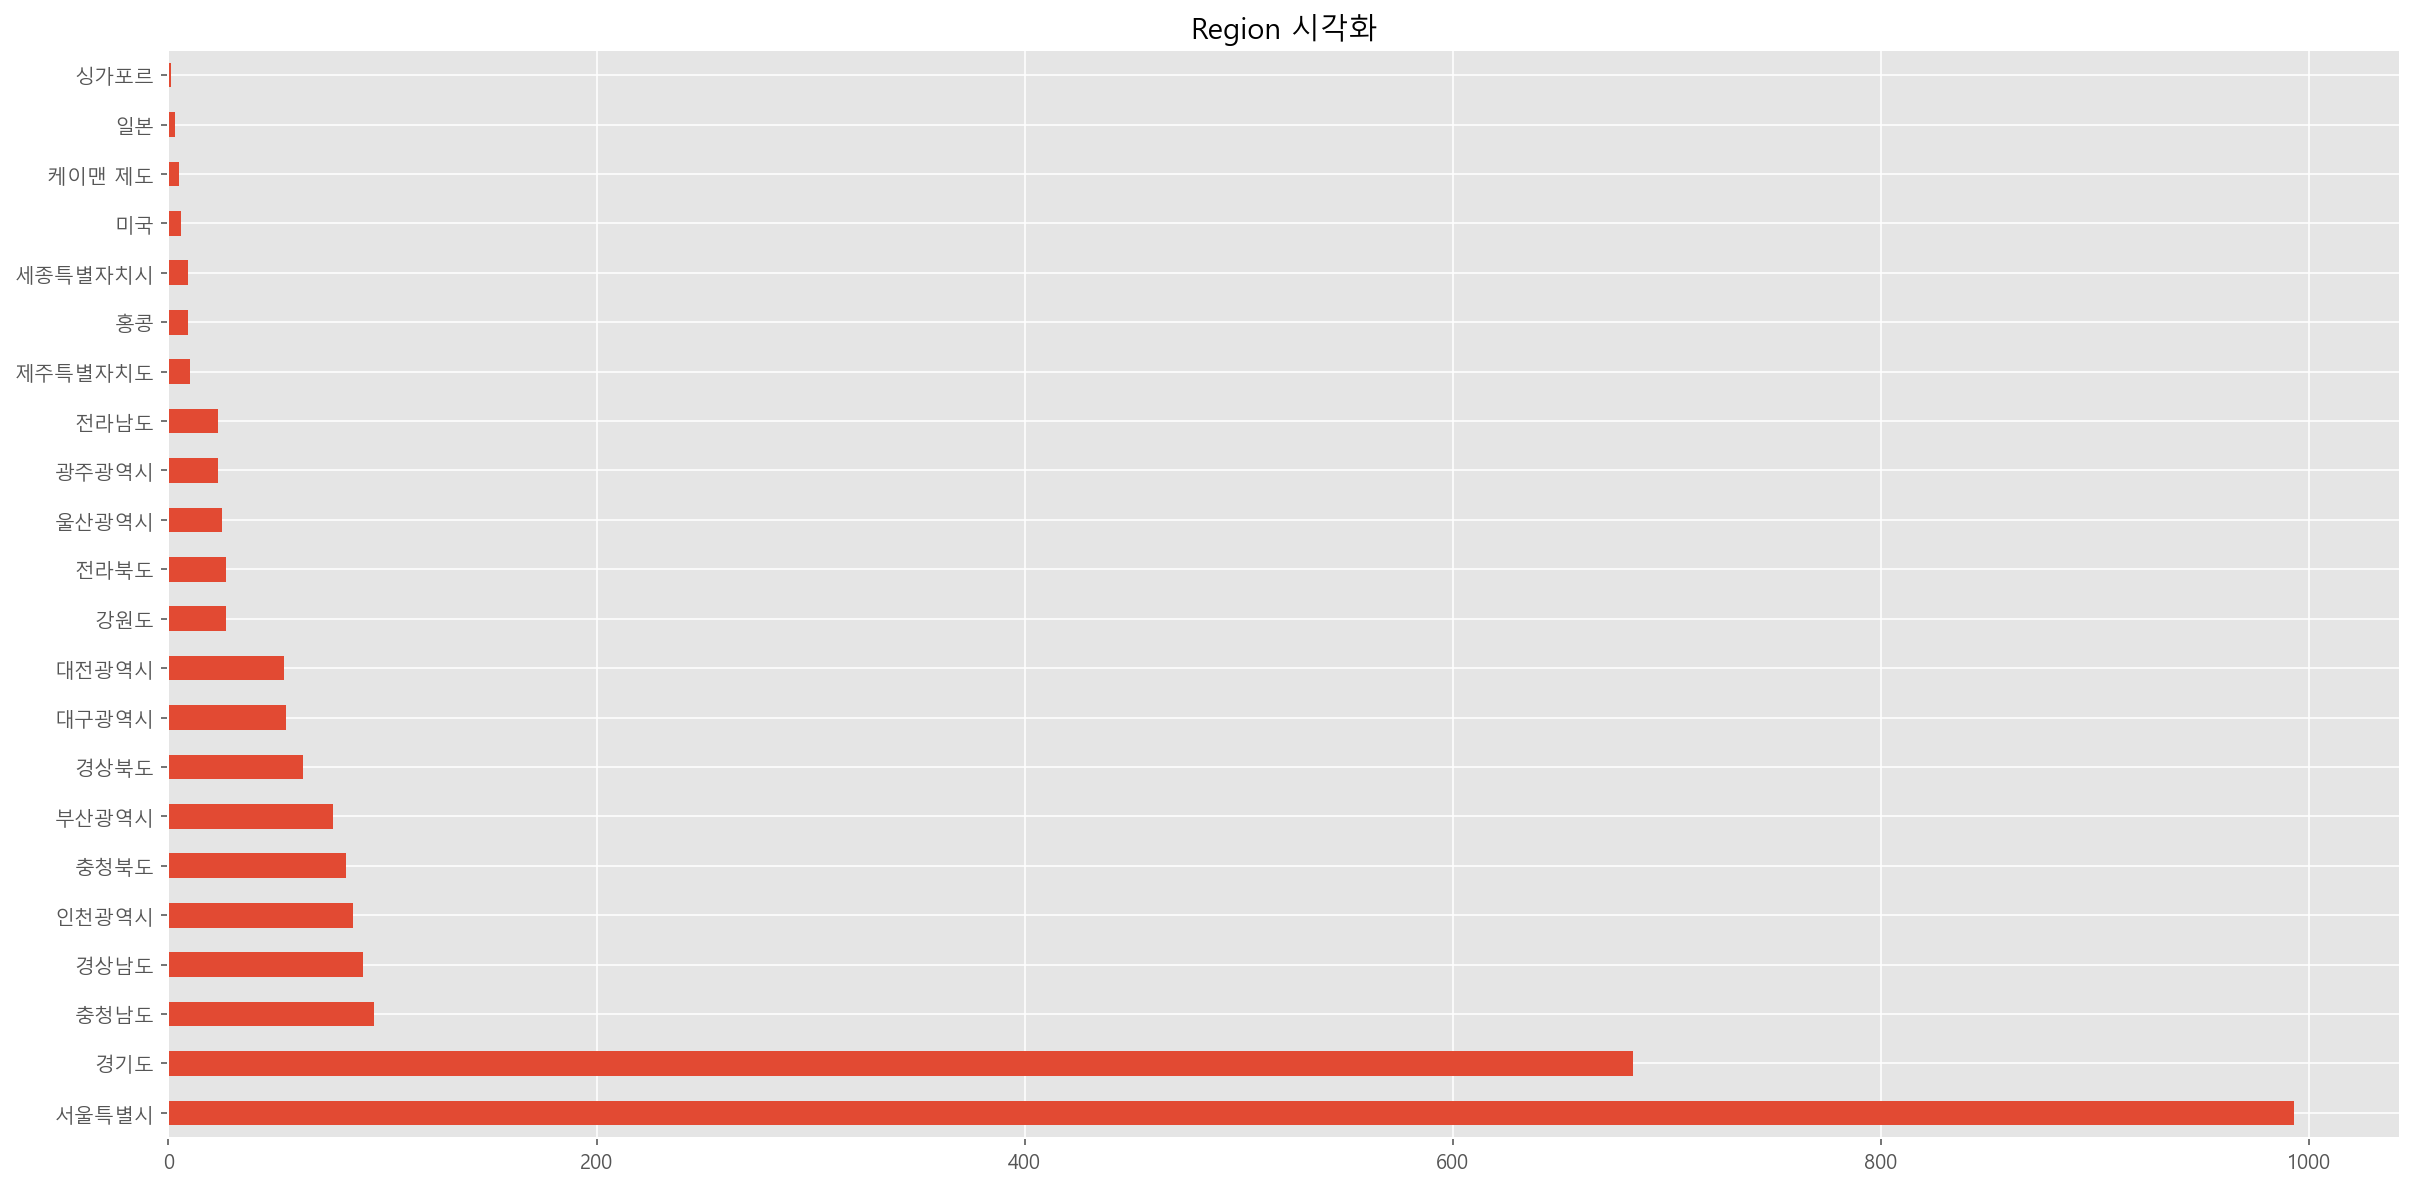

In [36]:
# Region 의 빈도수를 구합니다.
# value_counts()통해 지역별 상장회사의 빈도수를 봅니다.
df['Region'].value_counts().plot.barh(figsize=(20,10) , title="Region 시각화")

<AxesSubplot:title={'center':'Region 시각화'}>

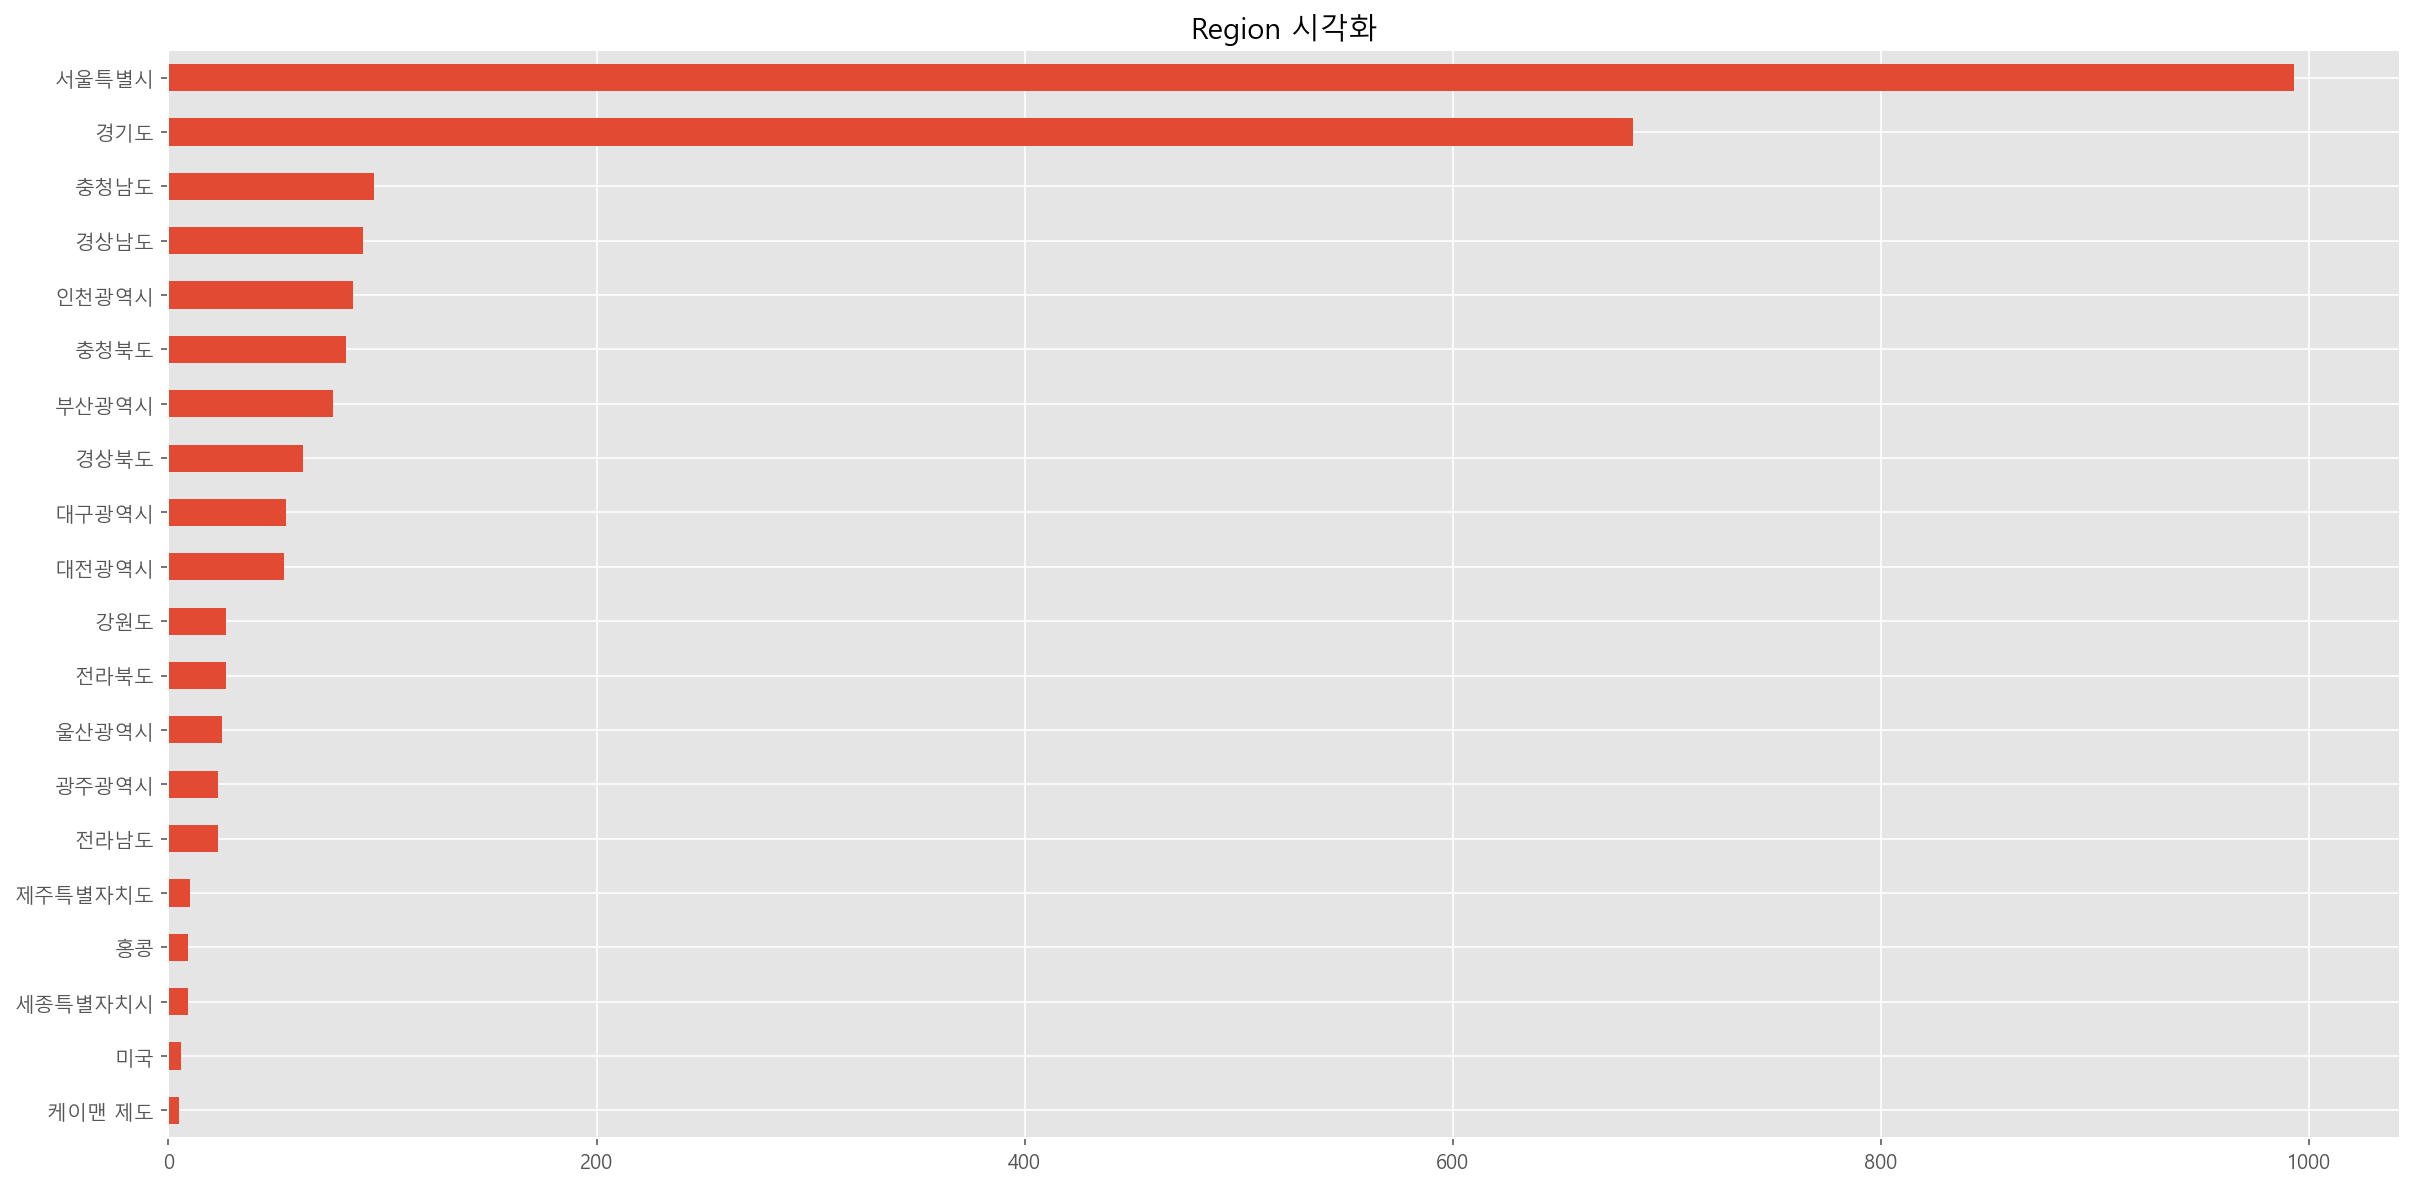

In [37]:
df['Region'].value_counts().head(20).sort_values().plot.barh(figsize=(20,10) , title="Region 시각화")

In [38]:
# value_counts() 를 인덱스 하자
df['Region'].value_counts().index

Index(['서울특별시', '경기도', '충청남도', '경상남도', '인천광역시', '충청북도', '부산광역시', '경상북도',
       '대구광역시', '대전광역시', '강원도', '전라북도', '울산광역시', '광주광역시', '전라남도', '제주특별자치도',
       '홍콩', '세종특별자치시', '미국', '케이맨 제도', '일본', '싱가포르'],
      dtype='object')

Text(0.5, 1.0, '소재지별 종목수')

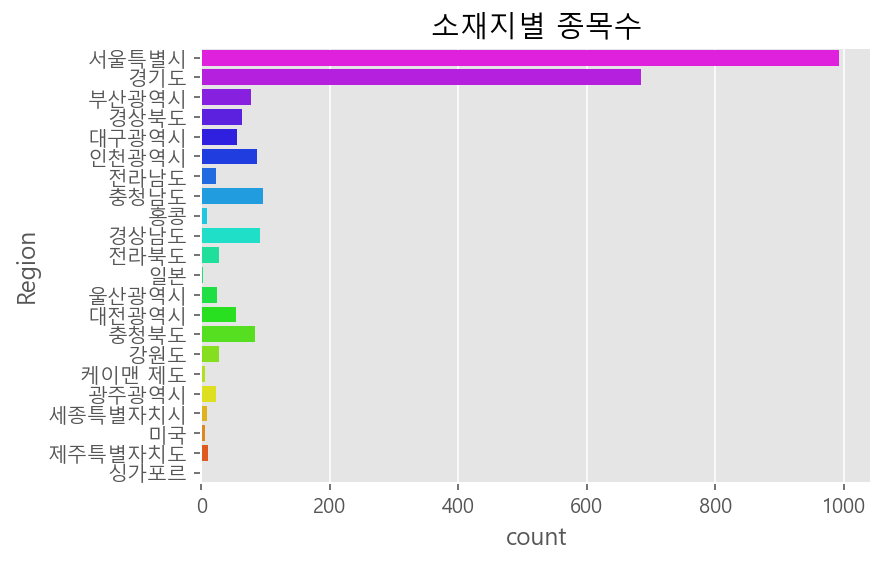

In [39]:
# Region 의 빈도수를 seaborn 의 countplot 으로 그립니다.
sns.countplot(data=df, y="Region", palette="gist_rainbow_r").set_title("소재지별 종목수")

In [40]:
# order 기능을 통해 빈도수를 정렬합니다.
# df["Region"].value_counts().index 로 Region 의 순서를 가져와서 지정합니다.

<AxesSubplot:xlabel='count', ylabel='Region'>

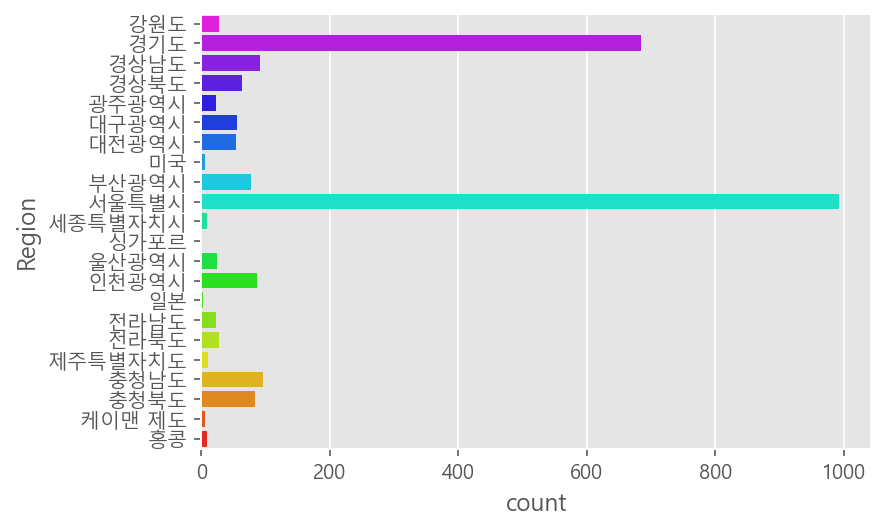

In [41]:
# Region 을 기준으로 정렬합니다.
sns.countplot(data=df.sort_values(by="Region"), palette="gist_rainbow_r" , y="Region")

## 두 개의 변수 빈도수 구하고 시각화 하기
* crosstab 으로 빈도수 구하기
* seaborn의 countplot 으로 빈도수 시각화
* pandas의 plot 기능으로 시각화
    * lineplot : 연속된 데이터(숫자, 기간)
    * barplot : 비연속 데이터(범주형)
    * hist : 연속된 수치 데이터의 범주화

### 지역별 상장 시장 종목 빈도수 구하기
* pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기

In [42]:
# pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기
# Market 과 Region 으로 빈도수 구하기

In [43]:
# countplot : Market 과 Region 으로 빈도수 시각화 하기 hue: 비교하고자 하는 것
pd.crosstab(df["Market"],df["Region"] )

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,7,36,0,5,5,1,7,0,2,52,...,0,4,0,3,1,1,3,9,0,0
KOSDAQ,16,501,49,39,9,33,39,6,39,530,...,9,57,3,13,15,2,67,60,4,9
KOSPI,4,147,42,19,9,21,8,0,36,411,...,16,25,0,7,11,7,26,14,1,0


### 연도별 상장 종목 빈도수 분석

<AxesSubplot:xlabel='count', ylabel='Region'>

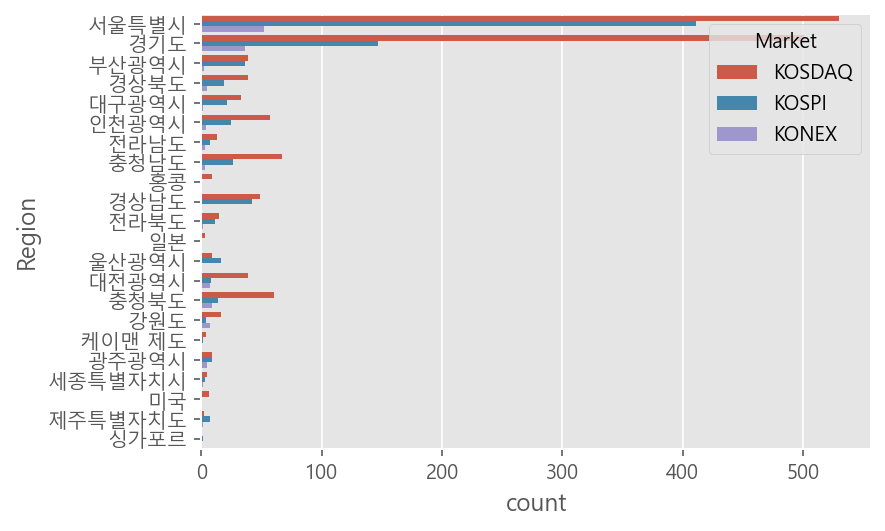

In [44]:
# Market, ListingYear 빈도수 구하기
sns.countplot(data=df, y="Region", hue='Market')

### 연도별 상장 종목 빈도수 분석

In [45]:
# Market, ListingDate 빈도수 구하기
df_market_year = pd.crosstab(df['Market'], df['ListingDate'])
df_market_year

ListingDate,1956-03-03,1956-07-02,1962-11-01,1964-01-04,1966-03-18,1968-10-21,1968-12-27,1969-05-13,1969-09-08,1969-11-20,...,2021-05-11,2021-05-14,2021-05-17,2021-05-20,2021-05-21,2021-05-26,2021-05-27,2021-05-28,2021-06-03,2021-06-04
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,2,2,0,1,1,0
KOSPI,3,2,1,1,1,1,5,1,1,1,...,1,0,0,0,2,0,1,0,0,0


In [46]:
#정수 배열 만들기
df_market_year_arr = []
for year in df_market_year:
    #print(int(year[0:4]))
    df_market_year_arr.append(int(year[0:4]))
df_market_year_arr

[1956,
 1956,
 1962,
 1964,
 1966,
 1968,
 1968,
 1969,
 1969,
 1969,
 1969,
 1969,
 1970,
 1970,
 1970,
 1970,
 1971,
 1972,
 1972,
 1972,
 1973,
 1973,
 1973,
 1973,
 1973,
 1973,
 1973,
 1973,
 1973,
 1973,
 1973,
 1973,
 1973,
 1973,
 1973,
 1974,
 1974,
 1974,
 1974,
 1974,
 1974,
 1974,
 1974,
 1974,
 1974,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1976,
 1977,
 1977,
 1977,
 1977,
 1977,
 1977,
 1977,
 1977,
 1977,
 1977,
 1977,
 1977,
 1978,
 1978,
 1978,
 1978,
 1978,
 1978,
 1978,
 1978,
 1978,
 1978,
 1979,
 1979,
 1980,
 1981,
 1983,
 1984,
 1984,
 1984,
 1984,
 1984,
 1985,
 1985,
 1985,
 1985,
 1985,
 1985,
 1985,
 1986,
 1986,
 1986,
 1986,
 1986,
 1986,
 1986,
 1986,
 1987,

In [47]:
# 칼럼값 
df_market_year.columns=df_market_year_arr
df_market_year

,1956,1956,1962,1964,1966,1968,1968,1969,1969,1969,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,2,2,0,1,1,0
KOSPI,3,2,1,1,1,1,5,1,1,1,...,1,0,0,0,2,0,1,0,0,0


### seaborn을 통한 빈도수 시각화

<AxesSubplot:xlabel='ListingDate', ylabel='count'>

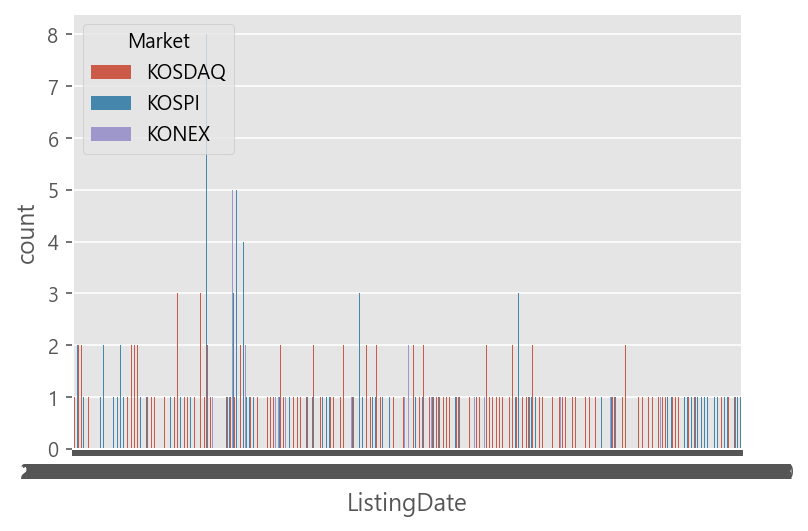

In [52]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# hue 를 사용해 다른 변수를 함께 표현합니다. hue는 색상을 의미합니다.
sns.countplot(data=df, x="ListingDate", hue="Market")

### Pandas를 통한 시각화

<AxesSubplot:>

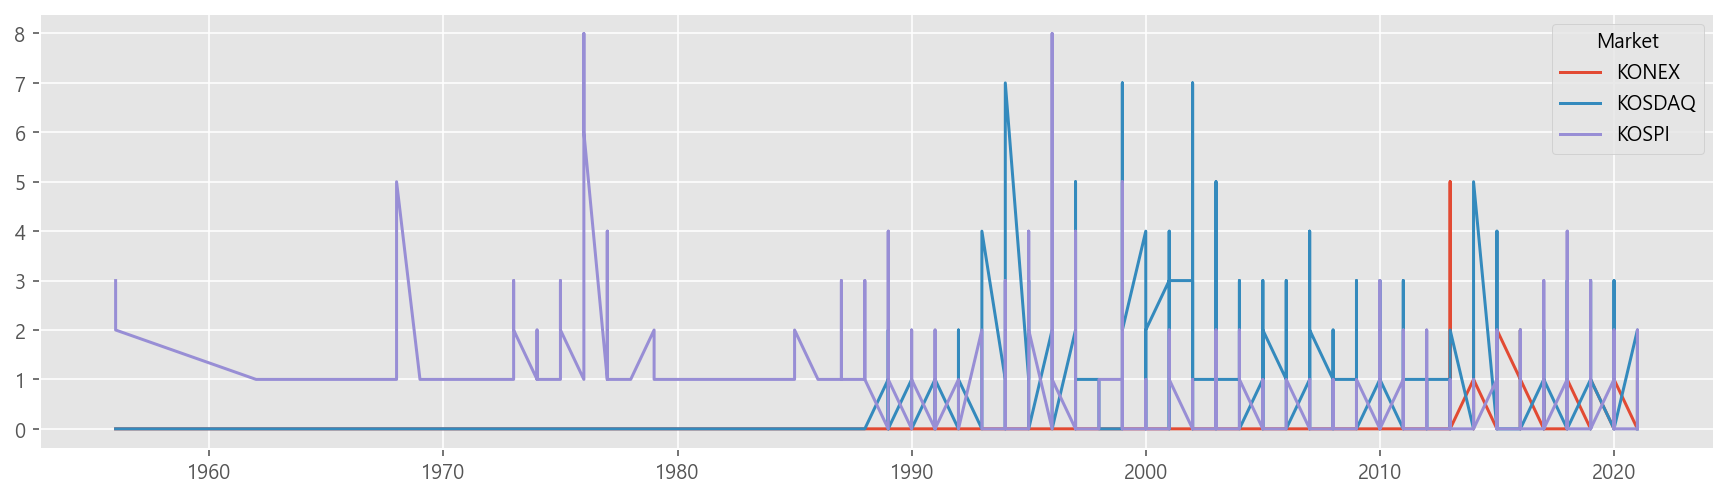

In [53]:
# Pandas plot 기능 활용하여 기본 그래프(line)를 그립니다.
# Pandas plot으로 그릴 때 x축에 인덱스 값이 y축에는 컬럼에 있는 값이 들어갑니다.
# 컬럼이 여러개라면 다른 색상으로 그려집니다.
df_market_year.T.plot(figsize=(15,4))

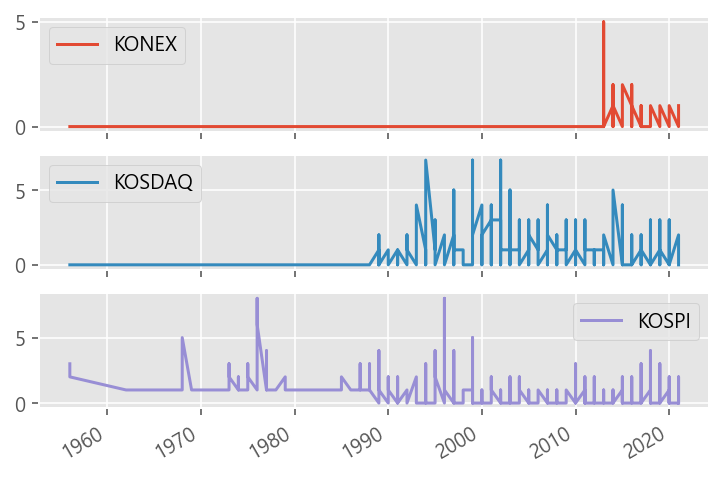

In [54]:
# 컬럼값을 subplots 으로 그립니다.
g  = df_market_year.T.plot(subplots=True)

<AxesSubplot:>

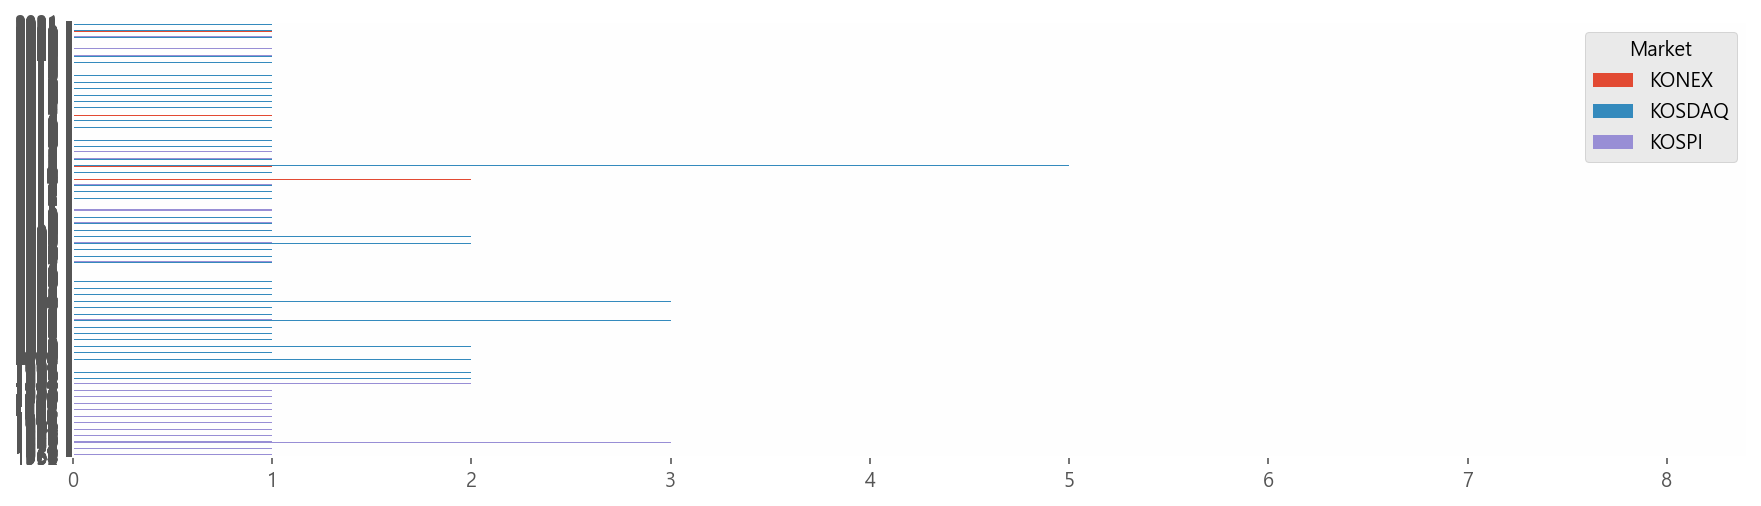

In [55]:
# Pandas plot 기능 활용하여 막대 그래프(bar, barh)를 그립니다.
df_market_year.T.plot.barh(figsize=(15,4))

### groupby 와 pivot_table로 빈도수 구하기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/06_valuecounts.svg">

* [How to calculate summary statistics? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)
* [Group by: split-apply-combine — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
* [pandas.pivot_table — pandas 1.2.0 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [140]:
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [141]:
#Symbol을 기준으로 그룹으로 묶는다.
df_year_market = df.groupby(["ListingDate", "Market"])["Symbol"].count()
df_year_market

ListingDate  Market
1956-03-03   KOSPI     3
1956-07-02   KOSPI     2
1962-11-01   KOSPI     1
1964-01-04   KOSPI     1
1966-03-18   KOSPI     1
                      ..
2020-12-28   KOSDAQ    1
2020-12-29   KONEX     1
2020-12-30   KONEX     1
2021-01-21   KOSDAQ    2
2021-01-25   KOSPI     1
Name: Symbol, Length: 1862, dtype: int64

In [143]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
df_year_market = df.groupby(["ListingDate", "Market"])["Symbol"].count().reset_index(name="count")
df_year_market

,ListingDate,Market,count
0,1956-03-03,KOSPI,3
1,1956-07-02,KOSPI,2
2,1962-11-01,KOSPI,1
3,1964-01-04,KOSPI,1
4,1966-03-18,KOSPI,1
...,...,...,...
1857,2020-12-28,KOSDAQ,1
1858,2020-12-29,KONEX,1
1859,2020-12-30,KONEX,1
1860,2021-01-21,KOSDAQ,2


In [145]:
# pivot_table로 같은 결과가 나오게 연산하기
df_year_market = pd.pivot_table(data=df,  index=["ListingDate", "Market"], values="Symbol", aggfunc="count")
df_year_market
df_year_market = df_year_market.rename(columns={"Symbol":"count"})
df_year_market

,,count
ListingDate,Market,
1956-03-03,KOSPI,3
1956-07-02,KOSPI,2
1962-11-01,KOSPI,1
1964-01-04,KOSPI,1
1966-03-18,KOSPI,1
...,...,...
2020-12-28,KOSDAQ,1
2020-12-29,KONEX,1
2020-12-30,KONEX,1


<AxesSubplot:xlabel='ListingDate', ylabel='count'>

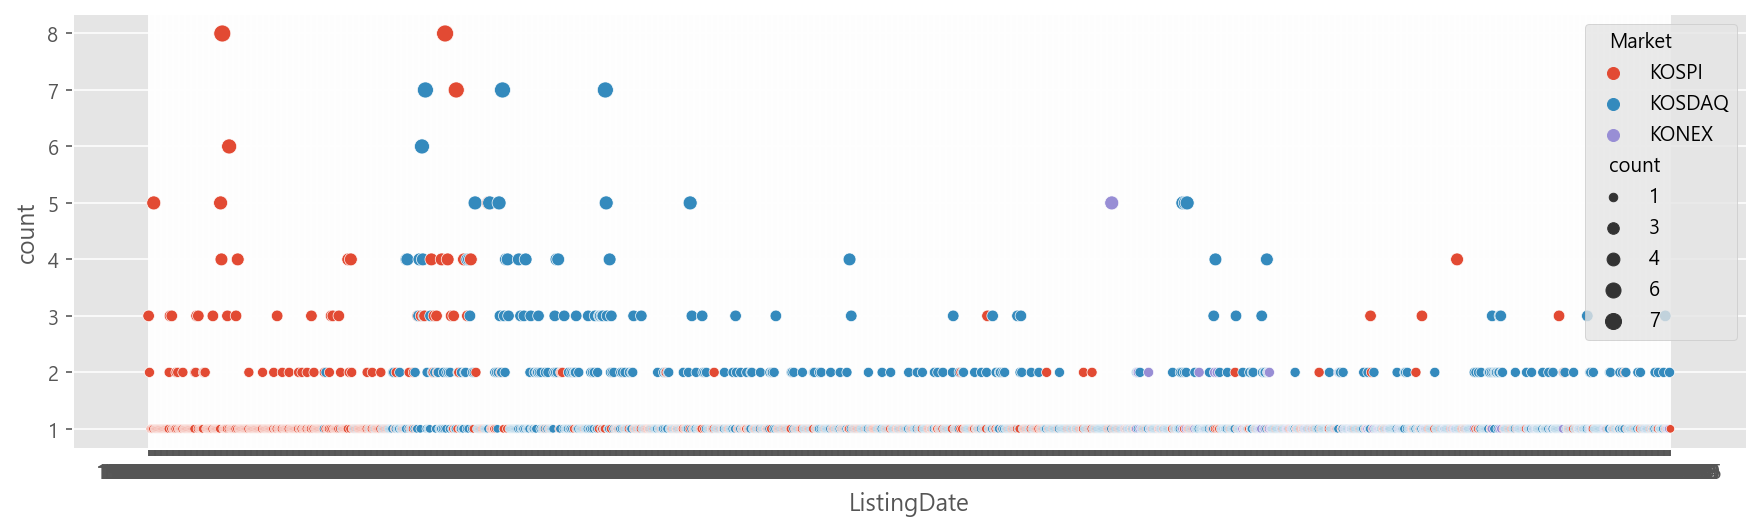

In [148]:
# 위의 groupby 결과를 scatterplot(산점도)으로 그립니다.
plt.figure(figsize=(15, 4))
sns.scatterplot(data=df_year_market, 
                x="ListingDate", y="count", 
                hue="Market", size="count")

In [44]:
# 수집한 종목의 선그래프를 Pandas 로 그립니다.
# 스케일이 다르기 때문에 subplots를 사용해 그려봅니다.